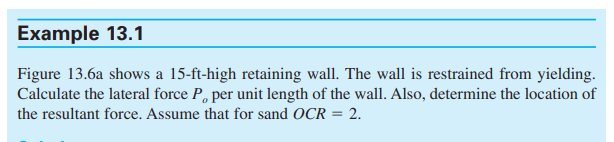

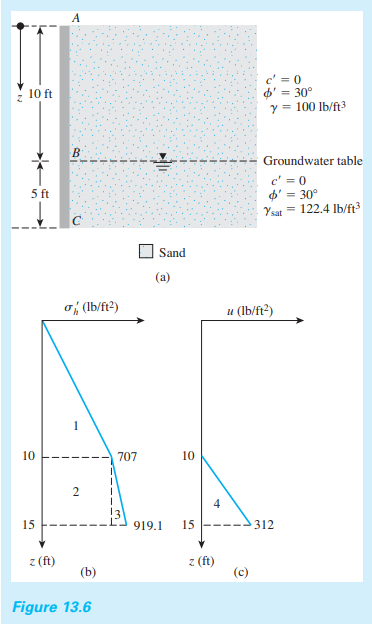

In [7]:
# Import pandas for use of dataframes
import pandas as pd

# Import the SoilProfile class from geotechpy to calculate the total and effective stresses
from geotechpy.soil_profile import SoilProfile

# Import the LateralEarthPressure class from geotechpy to calculate the lateral earth pressure
from geotechpy.lateral_earth_pressure import LateralEarthPressure

# Import the 
from geotechpy.constants import get_constants

# Show all columns of the dataframes
pd.set_option("display.max_columns", None)

In [8]:
# Read the soil profile data from a CSV file and store it in a dataframe

sp_df = pd.read_csv("soil_profile_Das_13_1.csv")

sp_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion
0,1,100,85,Sand,100,122.4,30,0,NaN,NaN


In [9]:
# Declare the variables needed for the SoilProfile and LateralEarthPressure classes

# The SoilProfile class needs the sp_df dataframe, uniform surcharge, water surface elevation, and the units system used.

# The LateralEarthPressure class needs the soil_profile.dataframe, backfill slope angle, wall back face agle from vertical, 
# wall interface friction angle, and the units system used.

# The calculations for at-rest earth pressures require input for OCR.

# Declare the uniform surcharge in kPa or psf
uniform_surcharge = 0

# Declare the water surface elevation in m or ft
water_surface_elevation = 90

# Declare the backfill slope angle in degrees
backfill_slope_angle = 0

# Declare the wall back face angle from vertical in degrees
wall_back_face_angle = 0

# Declare the wall interface friction angle in degrees
wall_interface_friction_angle = 0

# Declare the OCR for at-rest earth pressures
OCR = 2.0

# Declare the units system used, metric or imperial
units = "imperial"



In [10]:
# Create a SoilProfile object from the dataframe
soil_profile = SoilProfile(sp_df, uniform_surcharge, water_surface_elevation, units)

# Calculate the total and effective stresses using the calculate_all() method
soil_profile.calculate_all()

# Display the soil profile dataframe
soil_profile.dataframe

# Note that the layer containing the water surface elevation has been split into two layers, one above and one below the water surface elevation.

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress
0,1a,100,90,Sand,100,122.4,30,0,NaN,NaN,100.0,100.0,10,0.0,1000.0,500.0,0.0,0.0,0.0,1000.0,500.0
1,1b,90,85,Sand,100,122.4,30,0,NaN,NaN,60.0,122.4,5,1000.0,1300.0,1150.0,0.0,312.0,1000.0,1612.0,1306.0


In [11]:
# Create a LateralEarthPressure object from the soil_profile object
lateral_earth_pressure = LateralEarthPressure(soil_profile.dataframe, backfill_slope_angle, wall_back_face_angle, wall_interface_friction_angle, units)

# Calculate the at-rest lateral earth pressure using the calculate_at_rest_coefficents_pressures() method
lateral_earth_pressure.calculate_at_rest_all(OCR)

# Display the lateral earth pressure dataframe
lateral_earth_pressure.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,at_rest_coefficient,top_at_rest_pressure,bottom_at_rest_pressure,at_rest_force,at_rest_force_location
0,1a,100,90,Sand,100,122.4,30,0,NaN,NaN,100.0,100.0,10,0.0,1000.0,500.0,0.0,0.0,0.0,1000.0,500.0,0.71,0.0,710.0,3550.0,93.3
1,1b,90,85,Sand,100,122.4,30,0,NaN,NaN,60.0,122.4,5,1000.0,1300.0,1150.0,0.0,312.0,1000.0,1612.0,1306.0,0.71,710.0,923.0,4082.5,87.4


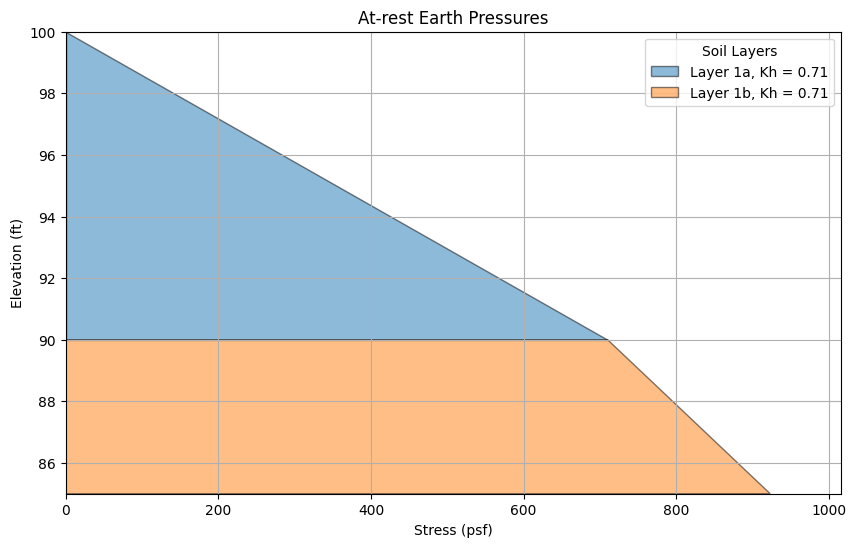

In [12]:
# Plot the lateral earth pressure diagram using the 
lateral_earth_pressure.plot_at_rest_pressures()

In [13]:
# Calculate the at-rest lateral force using the calculate_at_rest_force() method
lateral_earth_pressure.calculate_at_rest_force()

# Calculate the water forces using the calculate_water_force() method
lateral_earth_pressure.calculate_water_force()

# Calculate the total lateral force as the sum of the at-rest force values plus the sum of the water force values
total_force = lateral_earth_pressure.dataframe["at_rest_force"].sum() + lateral_earth_pressure.dataframe["water_force"].sum()

# Display the total lateral force
force_units = get_constants(units)["force_units"]
print("Total lateral force: {:.2f} {} per unit width of wall".format(total_force, force_units))

# Display the lateral earth pressure dataframe
lateral_earth_pressure.dataframe

Total lateral force: 8412.50 lbf per unit width of wall


,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,at_rest_coefficient,top_at_rest_pressure,bottom_at_rest_pressure,at_rest_force,at_rest_force_location,water_force
0,1a,100,90,Sand,100,122.4,30,0,NaN,NaN,100.0,100.0,10,0.0,1000.0,500.0,0.0,0.0,0.0,1000.0,500.0,0.71,0.0,710.0,3550.0,93.3,0.0
1,1b,90,85,Sand,100,122.4,30,0,NaN,NaN,60.0,122.4,5,1000.0,1300.0,1150.0,0.0,312.0,1000.0,1612.0,1306.0,0.71,710.0,923.0,4082.5,87.4,780.0
